In [85]:
# Michael Spearing
# February 23, 2017
# Data Science Lab 6

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.cluster import spectral_clustering
from sklearn.cluster import SpectralClustering
from collections import defaultdict
from copy import deepcopy

## Problem 1: KMeans

In [41]:
# K-means Algorithm
# https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/
class KMeans():
    def cluster_points(X, mu):
        clusters = {}
        clusterDistances = np.zeros((int(X.shape[0]), int(mu.shape[0])))
        for idx, x in enumerate(X):
            idx2 = 0
            for i in mu:
                dist = np.linalg.norm(x-i)
                clusterDistances[idx, idx2] = dist
                idx2 = idx2 + 1
            
        minimum = clusterDistances.argmin(axis=1)
        for idx, x in enumerate(X):
            try:
                index_min = minimum[idx]
                clusters[index_min].append(x)
            except KeyError:
                clusters[index_min] = [x]
        return clusters

    def reevaluate_centers(mu, clusters):
        newmu = []
        keys = sorted(clusters.keys())
        for k in keys:
            newmu.append(np.mean(clusters[k], axis = 0))
        return newmu
 
    def has_converged(mu, oldmu):
        if np.array_equal(mu, oldmu):
            return True
        return False
 
    def find_centers(X, K):
        rand1 = np.random.choice(X.shape[0], K)        
        rand2 = np.random.choice(X.shape[0], K)
        oldmu = []
        mu = []
        for i in range(0, K):
            oldmu.append(X[rand1[i]])
            mu.append(X[rand2[i]])
        while not KMeans.has_converged(mu, oldmu):
            oldmu = np.array(mu)
            mu = np.array(mu)
            clusters = KMeans.cluster_points(X, mu)
            mu = KMeans.reevaluate_centers(oldmu, clusters)
        mu = np.array(mu)
        return(mu, clusters)

## To compute the clusters given the centers you have to assign data points to the center that they are closest to

In [42]:
import random
 
def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

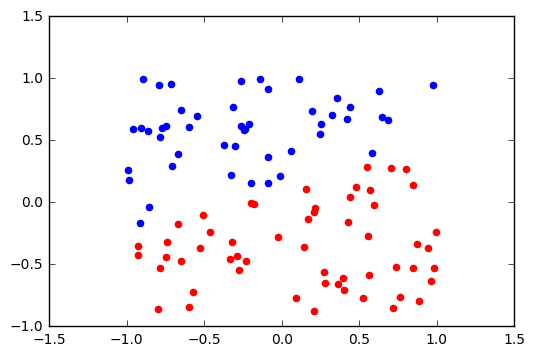

In [194]:
Y = init_board(100)
#plt.scatter(Y[:,0], Y[:,1])
m, c = KMeans.find_centers(Y, 2)
#print(c)
colors = ['red', 'blue']
for i in range(0,2):
    nextColor = colors.pop()
    #print(nextColor)
    x = c[i]
    x = np.array(x)
    plt.scatter(x[:,0], x[:,1], color=nextColor)
    plt.scatter(m[i,0], m[i,1], color=nextColor)
plt.show()

In [50]:
class KMeansPP(object):
    def __init__(self, df, k):
        self.k = min(k, df.shape[0])
        self.points = df.as_matrix()
        self.centers = []

        c1_index = np.random.randint(low=0, high=self.points.shape[0])
        self.centers.append(self.points[c1_index])

        for i in range(1, k):
            dist_vec = np.array([min([(c - x) @ (c - x)
                                      for c in self.centers])
                                 for x in self.points])
    
            probs = dist_vec / dist_vec.sum()
            cumprobs = probs.cumsum()
            r = np.random.rand()

            for j, p in enumerate(cumprobs):
                if r < p:
                    ci_index = j
                    break
            self.centers.append(self.points[ci_index])

        self.centers = np.array(self.centers)
        self.clusters = defaultdict(list)

    def _find_center(self, p):
        center_dists = np.linalg.norm(p - self.centers, axis=1)
        return np.argmin(center_dists)

    def _assign(self):
        clusters = defaultdict(list)
        for p in self.points:
            center_idx = self._find_center(p)
            clusters[center_idx].append(p)
        self.clusters = clusters

    def _update_centroids(self):
        self._assign()
        new_centers = np.zeros(self.centers.shape)
        for center_idx, cluster in sorted(self.clusters.items()):
            cluster_pts = np.array(cluster)
            avg = np.sum(cluster_pts, axis=0) / cluster_pts.shape[0]
            new_centers[center_idx] = avg
        self.centers = new_centers

    def run(self, num_iters=10):
        for i in range(num_iters):
            old_centroids = deepcopy(self.centers)
            self._update_centroids()
            if i != 0:
                if np.array_equal(self.centers, old_centroids):
                    break
        return zip(self.centers, list(self.clusters.values()))

In [51]:
iris = pd.read_csv('iris_data.csv')

iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


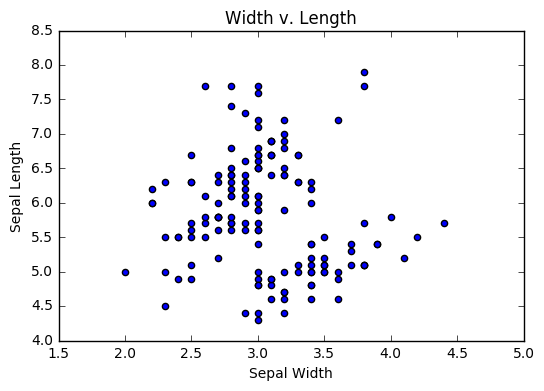

In [52]:
plt.scatter(iris['Sepal.Width'], iris['Sepal.Length'])
plt.title('Width v. Length')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.show()

In [59]:
iris_X = iris.drop(['Species', 'Petal.Length', 'Petal.Width'], axis=1)
iris_X.head()

,Sepal.Length,Sepal.Width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6


In [173]:
def plot_clusters(clusters, reverse=False):
    colors = ['r', 'b', 'g', 'm', 'y']
    for i, cluster in enumerate(list(clusters)):
        _, points = cluster
        # Seperate into x and y
        if not reverse:
            x = [point[1] for point in points]
            y = [point[0] for point in points]
        else:
            x = [point[0] for point in points]
            y = [point[1] for point in points]

        plt.scatter(x, y, c=colors[i])

    plt.show()

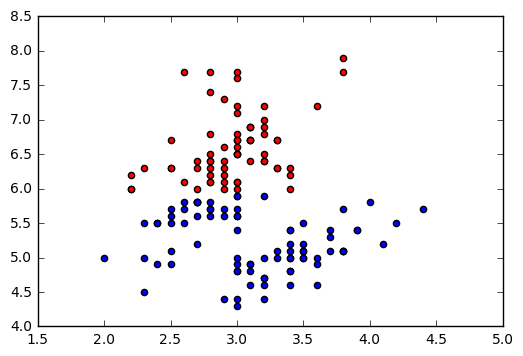

In [174]:
#from kmeanspp import KMeansPP

model = KMeansPP(iris_X, 2)
clusters_2 = model.run(num_iters=25)
plot_clusters(clusters_2)

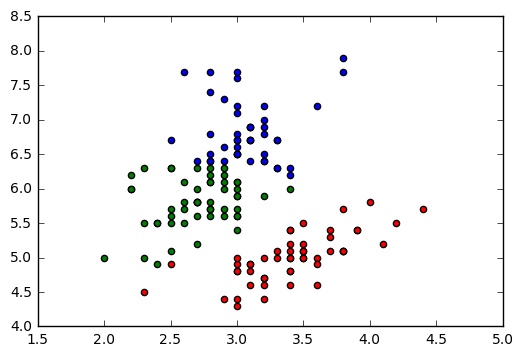

In [175]:
model = KMeansPP(iris_X, 3)
clusters_3 = model.run(num_iters=25)
plot_clusters(clusters_3)

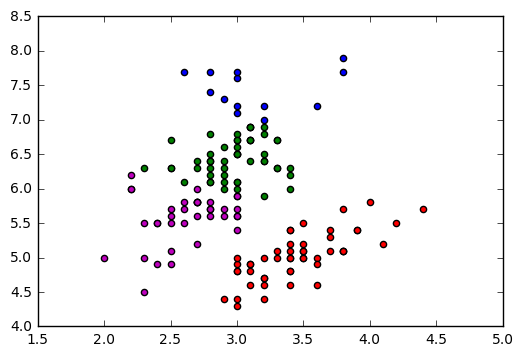

In [176]:
model = KMeansPP(iris_X, 4)
clusters_4 = model.run(num_iters=25)
plot_clusters(clusters_4)

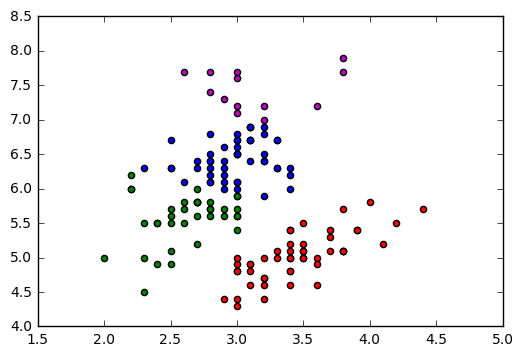

In [177]:
model = KMeansPP(iris_X, 4)
clusters_4 = model.run(num_iters=25)
plot_clusters(clusters_4)

# Problem 2: Spectral Clustering

In [163]:
# 1) Implement the NG, Jordan and Weiss SC algorithm

In [164]:
# 2) Generate data of 2 cocentric rings with noise
def cocentricDataWithNoise(number, radialDiff, varInner, varOuter):
    rIn, rOut = 1, 1 + radialDiff
    thetaIn = np.random.normal(0,1,number) * 2*math.pi
    thetaOut = np.random.normal(0,1,number) * 2*math.pi
    noiseInnerX = np.random.normal(0,varInner, number)
    noiseInnerY = np.random.normal(0,varInner, number)
    noiseOuterX = np.random.normal(0,varOuter, number)
    noiseOuterY = np.random.normal(0,varOuter, number)
    xIn = [None] * len(thetaIn)
    yIn = [None] * len(thetaIn)
    xOut = [None] * len(thetaOut)
    yOut = [None] * len(thetaOut)
    for i in range(len(thetaIn)):
        xIn[i] = rIn * math.cos(thetaIn[i]) + noiseInnerX[i]
        yIn[i] = rIn * math.sin(thetaIn[i]) + noiseInnerY[i]
        xOut[i] = rOut * math.cos(thetaOut[i]) + noiseOuterX[i]
        yOut[i] = rOut * math.sin(thetaOut[i]) + noiseOuterY[i]
    plt.figure(figsize=(10,10))
    plt.scatter(xIn,yIn, c='r')
    plt.scatter(xOut,yOut, c='b')
    plt.show()
    return([xIn,yIn], [xOut,yOut])

In [ ]:
cocentricDataWithNoise(500,1,.1,.1)

## Problem 4

In [166]:
from pylab import rand
def generateData(n):
    xb = (rand(n)*2-1)/2-0.5
    yb = (rand(n)*2-1)/2+0.5
    xr = (rand(n)*2-1)/2+0.5
    yr = (rand(n)*2-1)/2-0.5
    inputs = []
    for i in range(len(xb)):
        inputs.append([xb[i],1])
        inputs.append([xr[i],-1])
    return np.array(inputs)

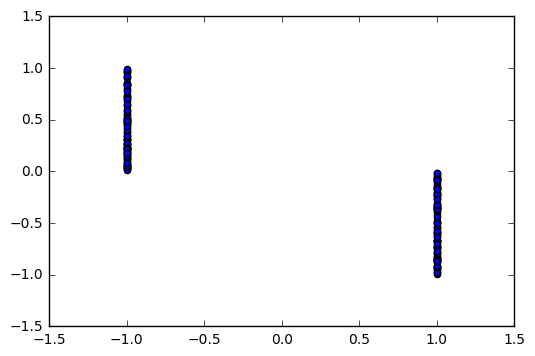

In [167]:
data = generateData(100)
plt.scatter(data[:,1], data[:,0])
plt.show()

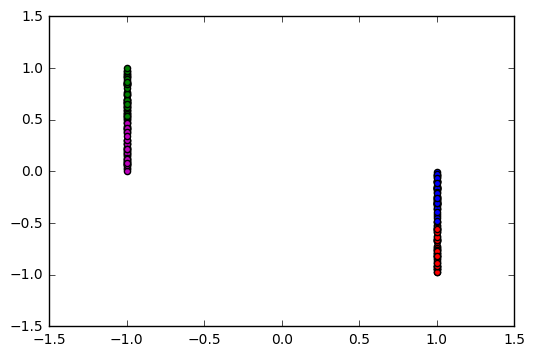

In [186]:
data = generateData(100)
data = pd.DataFrame(data)
model = KMeansPP(data, 4)
clusters = model.run(num_iters=25)
plot_clusters(clusters)

g
r
m
b


C:\Users\Connor Lewis\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


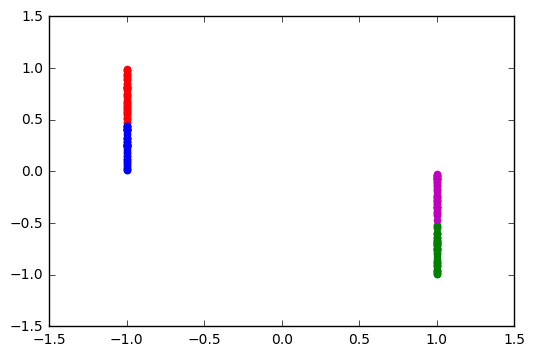

In [191]:
data = generateData(100)
data = np.array(data)
model = SpectralClustering(n_clusters = 4, affinity='nearest_neighbors', n_neighbors=10)
model = model.fit_predict(data)
cluster2 = {}
#print(data[0])
#print(model)
for idx, spectral_assignment in enumerate(model):
    #print(idx, x)
    #print(data[idx])
    try:
        cluster2[spectral_assignment].append(data[idx])
    except KeyError:
        cluster2[spectral_assignment] = [data[idx]]
colors = {'r','b','g','m'}
for i in range(0,4):
    nextColor = colors.pop()
    print(nextColor)
    x = cluster2[i]
    x = np.array(x)
    plt.scatter(x[:,1], x[:,0], color=nextColor)
    #plt.scatter(m[i,0], m[i,1], color=nextColor)
plt.show()

# The thinking was that a linearly separable graph would be better with a K-means algorithm but the spectral clustering algorithm seems to partition the data the same as the K-means